In [ ]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Question 1
The Lagrange interpolating polynomial is
$$ p(x) = \sum_{j=0}^{\infty}y_j L_j(x).$$
Show that the identity ,
$$ \sum_{j=0}^{n} L_j(x) = 1,$$
is true for all $x$.

**Hint: The answer requires no algebra. Use the fact that $f(x) = 1$ is a polynomial of degree zero and a Lagrange polynomial.**

------------------------------------------------------------------


By the existence uniqueness theorem (week 4 Wednesday slides), there is only one Lagrange interpolating polynomial that interpolates the set of points $(x_j, 1)$. Note that $L_0(x) = 1$ is a Lagrange polynomial of degree zero (you can check that it satisfies the definition), and it interpolates the points $(x_j, 1)$. Hence any Lagrange interpolating polynomial $p_n(x)$ for the set of points $(x_j, 1)$ must satisfy $p_n(x) = L_0(x) = 1$ for all $x$.


# Question 2

## A.
Write a function for computing the barycentric weights
$$w_j = \left[\prod_{\substack{i=0 \\\\ i\neq j}}^{n}(x_j - x_i)\right]^{-1}.$$
Your function should take as input a vector containing the nodes $x_j$ and output the weights $w_j$ . Call your function `baryfit`. Write another function for evaluating the barycentric interpolant
$p(x).$
This function should take as input a vector containing the nodes $x_j$, a vector containing the corresponding barycentric weights $w_j$ (generated from your `baryfit` function), a vector containing the corresponding function values $y_j = f(x_j)$, and the location (or a vector of locations) of where the interpolant should be evaluated. The output of the function should be the value of the interpolating polynomial at all the evaluation points. Call this function `baryeval`.

------------------------------------------------------------------

See code below.

## B.
Using your `baryfit` function from part a, generate the barycentric weights for the following two sets of nodes:
  1. $x_j = -1 + \frac{2j}{8}$, $j=0,1,\ldots, 8$
  2. $x_j = -\cos(\frac{j\pi}{8})$, $j=0,1,\ldots, 8$

Plot the values of the weights versus the corresponding values of the nodes (i.e plot ($x_j$ , $w_j$ )) for each of the node sets. Comment on the results.

------------------------------------------------------------------

See code and figure below. The first set of nodes (uniform nodes) tend have higher magnitude than the second, particulary near the center. The magnitude of the second set (Chebyshev) is constant except at the ends.


## C.
For the two node sets from part B, use your `baryval` function to evaluate the 8th degree polynomial interpolant of the function $f(x) = \vert x \vert$ at 101 equally spaced points between $[-1, 1]$. Plot the error ($p(x) − \vert x \vert$) in the polynomial interpolant at these evaluation points for each of the two node sets. Which node set seems to produce the best result? What criteria did you use to determine what ‘best’ means?

------------------------------------------------------------------

See code and figure below. The second set seems to be the best. The accuracy is better based on lower error over most of the interval $[-1, 1]$.


## D.
For certain sets of nodes $x_j$, it is possible to give explicit formulas for the barycentric weights $w_j$. The easiest case is when the nodes are equally spaced between $[−1,1]$, (i.e., $x_j =−1+\frac{2j}{n}$, $j=0,1,...,n$). Show that for these nodes
$$w_j = \frac{\left(\frac{n}{2}\right)^n(-1)^{n-j}}{n!}\binom{n}{j}$$
Note that since $w_j$ appear both in the numerator and denominator of the barycentric formula for $p(x)$, any factors common to all $w_j$ can be factored out. Thus, we can reduce the above expression for the barycentric weights to $w_j =(−1)^j\binom{n}{j}$.

------------------------------------------------------------------

\begin{align}
\prod_{\substack{i=0 \\\\ i\neq j}}^{n}(x_j - x_i) &=
\prod_{\substack{i=0 \\\\ i\neq j}}^{n}\left(\frac{2}{n}(j - i)\right) \\
& = \left(\frac{2}{n}\right)^n\prod_{i=0}^{j-1}(j - i)\prod_{i=j+1}^{n}(j - i) \\
& = \left(\frac{2}{n}\right)^nj!\prod_{i=j+1}^{n}(j - i) \\
& = \left(\frac{2}{n}\right)^nj! (-1)^{n-j}\prod_{i=j+1}^{n}(i - j) \\
& = \left(\frac{2}{n}\right)^n j! (-1)^{n-j} (n-j)! \\
& =   \frac{n!}{\left(\frac{n}{2}\right)^n(-1)^{n-j}\binom{n}{j}}
\end{align}
Hence,
$$ w_j = \frac{1}{\displaystyle \prod_{\substack{i=0 \\\\ i\neq j}}^{n}(x_j - x_i)}
= \frac{\left(\frac{n}{2}\right)^n(-1)^{n-j}\binom{n}{j}}{n!}.
$$

In [ ]:
## Q2 Part A

def baryfit(xnodes):
    n = xnodes.size - 1
    w = zeros(n+1) # empty array to store weights
    for j in arange(n+1): # j = 0, 1, ..., n
        denominator = 1.
        for i in arange(n+1):# i = 0, 1, ..., n
            if i == j:
                continue ## this command will skip to the next iteration of the loop
            denominator = denominator*(xnodes[j] - xnodes[i])
        w[j] = 1/denominator
    return w
def baryeval(x, xnodes, ynodes, weights):
    n = xnodes.size - 1
    m = x.size
    numerator = zeros(m)
    denominator = zeros(m)
    for k in arange(m): ## loop over each evaluation point in `x`
        for j in arange(n+1): # j = 0, 1, ..., n
            if x[k] == xnodes[j]: # check if x = x_j
                numerator[k] = ynodes[j] ## p(x_j) = y_j
                denominator[k] = 1.
                break ## this will end the inner-most loop (skip to the next value of k)
            numerator[k] = numerator[k] + ynodes[j]*weights[j]/(x[k] - xnodes[j])
            denominator[k] = denominator[k] + weights[j]/(x[k] - xnodes[j])
    p_of_x = numerator/denominator
    return p_of_x


## vectorize versions: This is not required for the problem. I am including them as
## an example of writting more efficient code that minimizes the use of loops
def baryfit_vectorized(xnodes):
    w = 1/(
        xnodes[None, :]
        - xnodes[:, None]
        + eye(xnodes.size) # identity matrix, eliminates the i = j case
    ).prod(axis=0)
    return w
def baryeval_vectorized(x, xnodes, ynodes, weights):
    ## this version does not check if x = x_j
    ####################
    # check that nodes and weights have the same number of elements
    assert xnodes.size == ynodes.size == weights.size
    # check that all arrays are 1D arrays
    assert xnodes,ndim == ynodes.ndim == weights.ndim == 1
    bary = weights[:, None]/(x[None, :] - xnodes[:, None])
    y = (bary*ynodes[:, None]).sum(axis=0)/bary.sum(axis=0)
    return y

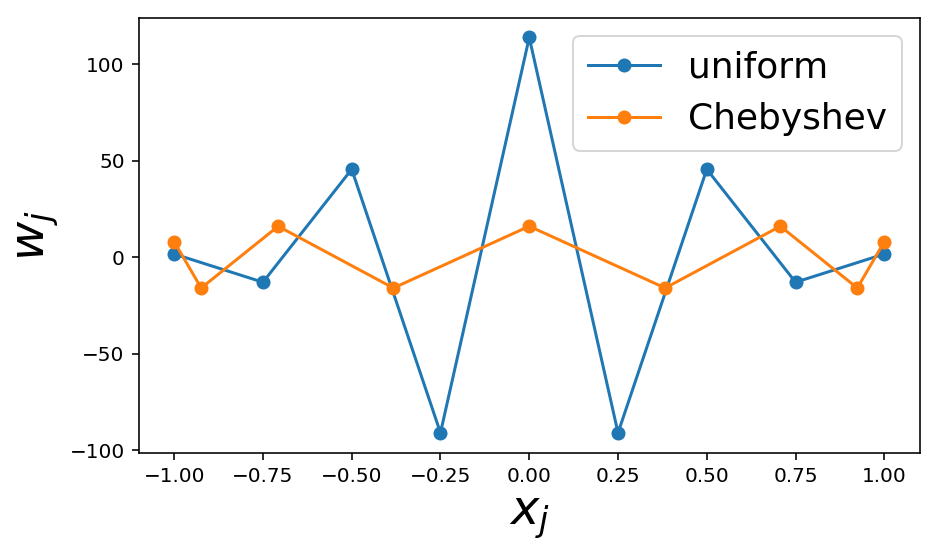

In [ ]:
## Q2 Part B
j = arange(8+1)
x_set1 = -1 + 2*j/8.
x_set2 = -cos(j*pi/8.)

w_set1 = baryfit(x_set1)
w_set2 = baryfit(x_set2)

figure(1, [7, 4])
plot(x_set1, w_set1, '-o', label='uniform')
plot(x_set2, w_set2, '-o', label='Chebyshev')
xlabel(r'$x_j$', fontsize=24)
ylabel(r'$w_j$', fontsize=24);
legend(fontsize=18);

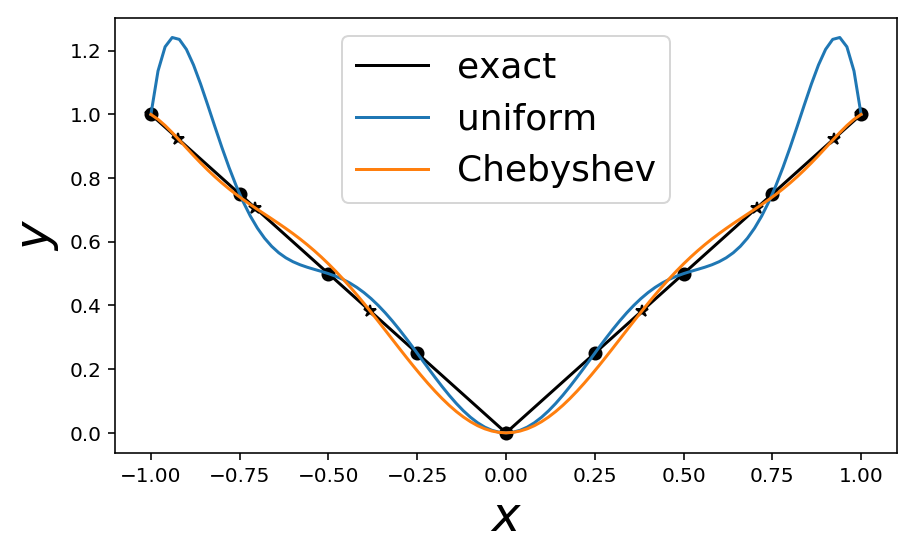

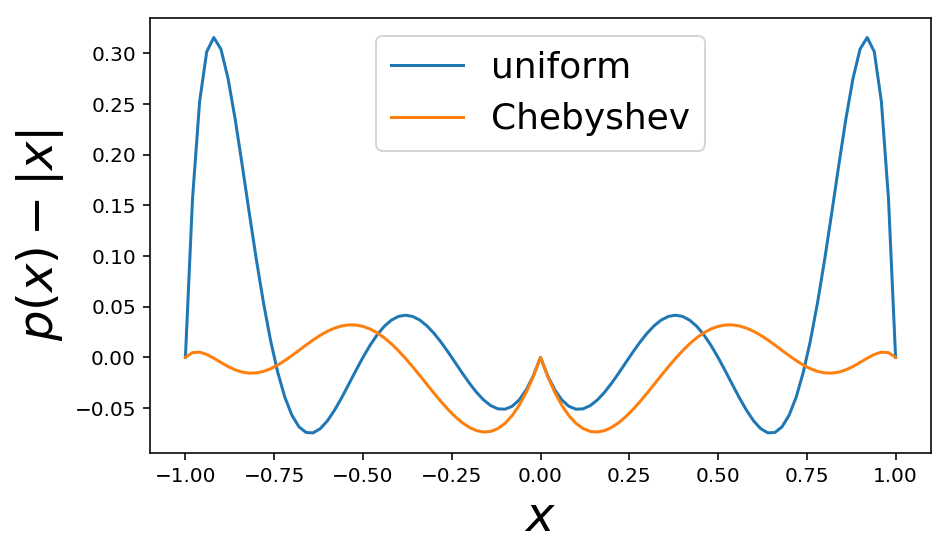

In [ ]:
## Q2 Part C
y_set1 = absolute(x_set1)
y_set2 = absolute(x_set2)
x = linspace(-1, 1, 101) # 101 equally spaced points betweein -1 and 1
p_set1 = baryeval(x, x_set1, y_set1, w_set1)
p_set2 = baryeval(x, x_set2, y_set2, w_set2)
yexact = absolute(x)

figure(1, [7, 4])
plot(x, yexact, 'k', label='exact')
plot(x_set1, y_set1, 'ko')
plot(x_set2, y_set2, 'k*')
plot(x, p_set1, label='uniform')
plot(x, p_set2, label='Chebyshev')
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);
legend(fontsize=18);

figure(2, [7, 4])
plot(x, (p_set1 - yexact), label='uniform')
plot(x, (p_set2 - yexact), label='Chebyshev')
xlabel(r'$x$', fontsize=24)
ylabel(r'$p(x) - |x|$', fontsize=24);
legend(fontsize=18);

# Question 3
Suppose you are given the following experimental measurements:
\begin{align}
	x_i &\qquad f(x_i) \\\\
	0.08 &\qquad 0.6739 \\\\
	0.46 &\qquad 2.4306 \\\\
	1.00 &\qquad 0.0000 \\\\
	1.51 &\qquad -1.0621 \\\\
	2.05 &\qquad 0.0986
\end{align}

## A.
Write a python script (using the code from Q2) that approximates $f(0.75)$ using the following Lagrange polynomials:
\begin{align}
	&\text{$P_1$ using $x_0 = 0.46$, and $x_1 = 1.00$;} \\\\
	&\text{$P_2$ using $x_0 = 0.46$, $x_1 = 1.00$, and $x_2 = 1.51$;} \\\\
	&\text{$P_3$ using $x_0 = 0.08$, $x_1 = 0.46$, $x_2 = 1.00$, and $x_3 = 1.51$;} \\\\
	&\text{$P_4$} \text{ using all five points}.
\end{align}

------------------------------------------------------------------

See code below.

## B.
The information in the above table corresponds to the function
\begin{equation}
f(x) = \sin(\pi x)e^{\cos(x)}.
\end{equation}

What is the absolute error of each of your approximations $P_i(0.75)$? Which Lagrange polynomial was the most accurate? Is this the result you expected?

------------------------------------------------------------------

The Lagrange polynomial $P_3(0.75)$ was the most accurate, since the absolute error associated with this interpolant was the smallest. This *is not* the result I expected! I would have assumed a higher-order interpolant ($P_4$) would be more accurate, yielding a smaller absolute error, but this assumption was wrong.

Just for fun, you can modify the `print()` statement in the above code to see that the relative error associated with $P_3(0.75)$ is *also* the smallest -- within 3% of $f(0.75)$. By both these measures, $P_3(0.75)$ is the most accurate Lagrange interpolant of $f(0.75)$.

In [ ]:
# ====== Question 3 solution ======
# translated from original MatLab solution
x =[0.08,   0.46,   1.00, 1.51,    2.05] # x points
fx=[0.6739, 2.4306, 0,    -1.0621, 0.0986] # f(x) data

# ------ initialize space ------
P = zeros(4) #storage for P_0, P_1, ...
start = [1, 1, 0, 0] #list of indices in x[] indicating what is x0 for each P_i
                     #these serve as an offset factor since we'll build all 4
                     #polynomial approximations in a set of nested loops

# ------ get some important information ------
n=len(P)
X = 0.75 # value we're interested in
F = sin(pi*X)*exp(cos(X))

for i in arange(n): #outer loop builds P_i
    nterms = i+2 #"first" iteration (i=0) there is (i+1)+1 terms in the Lagrange polynomial
    x0 = start[i] #index corresponding to which starting x0 to use
    for j in arange(nterms): #each iteration adds one term to P_i
        L=1 #initialize an empty product
        k=0
        while k<nterms:
            if k==j:
                k+=1 #skip (X - x_k)/(x_j - x_k) = NaN
            else:
                L *= (X-x[x0+k])/(x[x0+j]-x[x0+k]) #multiply another term into L
                k+=1
        P[i] += fx[x0+j]*L #add the newly completed term to P_i
    print('P_',i+1,'(',X,') =',round(P[i],4),'and |f(',X,') - P_',i+1,'(',X,')| =',round(abs(F-P[i]),4))

P_ 1 ( 0.75 ) = 1.1253 and |f( 0.75 ) - P_ 1 ( 0.75 )| = 0.3445
P_ 2 ( 0.75 ) = 0.9583 and |f( 0.75 ) - P_ 2 ( 0.75 )| = 0.5115
P_ 3 ( 0.75 ) = 1.4292 and |f( 0.75 ) - P_ 3 ( 0.75 )| = 0.0406
P_ 4 ( 0.75 ) = 1.2894 and |f( 0.75 ) - P_ 4 ( 0.75 )| = 0.1804
